# Final Project TN3156: Investigating the effects of thermal noise and decay rates on the coherence of a spin qubit.

**Authors: Maria Tudor, Luis Cabo.**

## Introduction

In this project the aim is to model how the characteristics of a spin 1/2 qubit are influenced by the effects of thermal noise in an environment. We want to focus in the specific effects varying certain initial criteria (decay rates, temperature...) can have on the decoherence of the qubit, and how these effects can be controlled to reduce the time it takes for a qubit to lose coherence and turn to an equilibrium state. Our goal is to induce decoherence in a virtual qubit by applying external thermal noise and observe how it changes with time. We will try to deduce the correlation between the noise and the decoherence of the qubit via our plots.

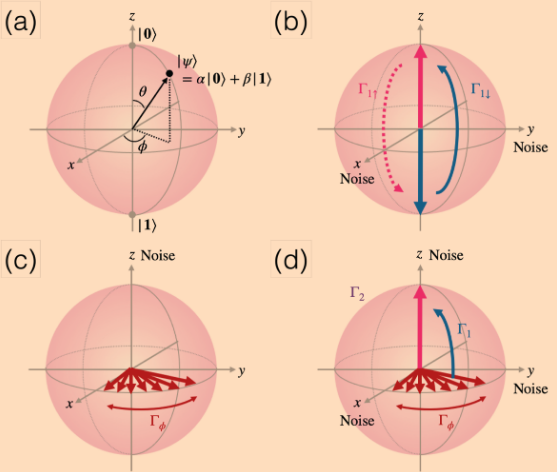

*Figure 1: Noise model affecting a spin qubit.*

## Description of the physical problem being simulated

This simulation models the dynamics of a spin-1/2 qubit interacting with a thermal bath (Fig.2) at various temperatures. For example, we could be replicating how a qubit’s superposition states are affected by the temperature of its thermal control lines.The qubit is a two-level quantum system, described by a Hamiltonian that governs its coherent evolution, other than the Liouvillian term of the LInblad equation. The Hamiltonian of the system, coupled with the liouvillian term models the relaxation, excitation and dephasing of the qubit in the environment. Initially the qubit is in a superposition state of 2 excitation states (|0> + |1>). We are trying to extract the way the environment the qubit is in affects the distribution of these excitation levels and understand how to decrease the time it takes for a qubit to lose its superposition properties. 

Initially, if the qubit was in a perfect environment with no noise, the dynamics would be solely governed by the Schrodinger equation of the Hamiltonian, and the expectation values of the pauli operators would produce the Rabi oscillations that would continue indefinitely. In this case however since we have external noise acting on the qubit, this will introduce a factor of decoherence and dissipate these oscillations over time, as the qubit reaches thermal equilibrium with the environment. This number of thermal excitations can be extracted by measuring the thermal photon number. 

The noise will have different effects based on the initial temperature and the decay factors that affect the coherence. We predict that when the temperature of the system increases, the excitation number (number of photons that interact with the qubit) should increase according to the Bose-Einstein distribution, meaning there will be a higher population of the excited state ∣1⟩. Meaning that the qubit will reach an equilibrium state (and thus lose coherence)  faster as the temperature increases. Additionally, we also predict that by increasing the decay factors of the qubit, it will of course lead to quicker dephasing of the qubit because the oscillations of its pauli operators will dampen quicker (increasing decay in any direction will affect the whole system).

![Qubit_model_bath](https://cdn.journals.aps.org/journals/PRXQUANTUM/key_images/10.1103/PRXQuantum.3.020305.png)

*Figure 2: Simple model of spin qubit in thermal bath.*



## Aim and scope of the project


- Model the interaction and relationship between a spin 1/2 qubit and a thermal bath at various temperatures.
- Investigate how thermal noise, characterized by different temperatures, affects the qubit's superposition states and coherence.
- Explore how the decay rates affect the qubit's loss of coherence and the transition to thermal equilibrium and phase loss.
- Think about future methods to control and minimize the effects of thermal noise and decay to optimize qubit performance in quantum computing systems.

## Techniques and approach

We start by initializing the constants, values and matrices that we are going to use. Next, we calculate the Hamiltonian and initialize the qubit in a superposition state: ∣𝜓0⟩ = 1/sqrt(2) * (∣0⟩+∣1⟩), which is afterwards converted to a density matrix.

We used three methods, one for each plot we showcase: _Spin Qubit Evolution in Thermal Bath, Decay effects on 𝜎z, Steady-State Population vs. Temperature_. All of them are based on the same calculations.

We start with simulating the evolution of a spin qubit interacting with a thermal bath, by using the Lindblad master equation ("_Circuit quantum electrodynamics_" - Alexandre Blais, Arne L. Grimsmo, S. M. Girvin, Andreas Wallraff - equation 77):

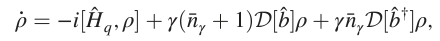

where _H_ is the system's Hamiltonian, _n_ is the thermal photon number and _D_ takes the place of the collapse operators. We chose this version of the equation as it also includes the thermal element. We will model _n_ (the thermal bath) using the Bose-Einstein distribution (https://en.wikipedia.org/wiki/Bose%E2%80%93Einstein_statistics), and thus we can also include the temperature parameter (where _g_ is 1, _T_ is the temperature, _epsilon_ is ℏω and _μ_ is 0):

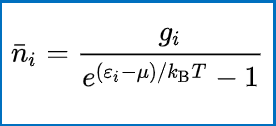

The collapse operators used include:

1. _Relaxation (𝜎-):_ Models decay from the excited state ∣1⟩ to the ground state ∣0⟩.
2. _Excitation (𝜎+):_ Models thermal excitation from ∣0⟩ to ∣1⟩.
3. _Dephasing (𝜎z):_ Captures loss of coherence in the qubit.

After using the Lindblad equation, we extract the expectation values of the sigma values we are interested in, so that we can plot them. Using _ipywidgets_, we implement sliders to adjust certain parameters and visualize their effect on the plot.

1. _Spin Qubit Evolution in Thermal Bath:_ Here we observe the time evolution of Population and Coherence. ⟨𝜎z⟩ tracks the population difference between the ground state and the excited state over time: starts from an initial value (near 0) and approaches a steady-state value determined by the thermal bath (temperature-dependent). ⟨𝜎x⟩ and ⟨𝜎y⟩ measure the decay of quantum coherence (off-diagonal elements of the density matrix): these decay to zero over time, indicating the loss of quantum coherence due to dephasing and dissipation. Faster decay of ⟨𝜎x⟩ and ⟨𝜎y⟩ implies stronger decoherence effects.

2. _Decay effects on 𝜎z:_ Additional noise effects are modeled through 𝜎x and 𝜎y decay channels, to investigate how different types of noise influence the qubit's behavior. We observe a smoother or sharper transition to the steady-state value of ⟨𝜎z⟩, depending on the magnitude of the decay rates. Larger decay rates (𝛾x, 𝛾y) accelerate the system’s relaxation to equilibrium, shortening the coherence time. At lower decay rates, the population difference persists longer, indicating reduced environmental influence.

3. _Steady-State Population vs. Temperature:_ This plot shows the steady state ⟨𝜎z⟩ as a function of _T_. So, it highlights how thermal baths determine the equilibrium population: the transition from quantum dominance (ground state) to classical thermalization (balanced populations). At low temperatures, ⟨𝜎z⟩ is closer to +1, indicating that the qubit predominantly remains in its ground state. As temperature increases, ⟨𝜎z⟩ becomes more negative, reflecting an increase in the excited state population due to thermal excitation. This drives the population difference toward zero (equal populations of ∣0⟩ and ∣1⟩).

The code can be used by running the simulation with the default parameters and adjusting the sliders in order to see the effects on the coherence and population.

##  Results

(Before running the code underneath, run the final piece of code!)

1. _Spin Qubit Evolution in Thermal Bath:_ The first result investigates the time evolution of the spin qubit’s population and coherence under the influence of thermal noise. The primary research question here was: how does thermal noise affect the qubit's population difference (⟨𝜎z⟩) and coherence (⟨𝜎x⟩ and ⟨𝜎y⟩) over time? 

In [2]:
interact(simulate_and_plot, temp=FloatSlider(value=0.5, min=0.1, max=5.0, step=0.1, description="T(K)"));

interactive(children=(FloatSlider(value=0.5, description='T(K)', max=5.0, min=0.1), Output()), _dom_classes=('…

* The figure shows that higher temperatures accelerate this decay, highlighting the critical role of thermal noise in reducing coherence time.
* ⟨𝜎z⟩ tracks the population difference between the ground state and the excited state over time: starts from an initial value (near 0) and approaches a steady-state value determined by the thermal bath (temperature-dependent).
* ⟨𝜎x⟩ and ⟨𝜎y⟩ measure the decay of quantum coherence (off-diagonal elements of the density matrix): these decay to zero over time, indicating the loss of quantum coherence due to dephasing and dissipation. Faster decay of ⟨𝜎x⟩ and ⟨𝜎y⟩ implies stronger decoherence effects.

2. _Decay effects on 𝜎z:_ The second result examines how additional noise effects, modeled through 𝜎x and 𝜎y decay channels, influence the population dynamics of the qubit. The research question addressed here was: how do different decay rates (𝛾x, 𝛾y) alter the qubit’s relaxation to equilibrium?

In [3]:
interact(
    simulate_with_decay,
    temp=FloatSlider(value=0.5, min=0.1, max=5.0, step=0.1, description="T(K)"),
    gamma_x=FloatSlider(value=0.1, min=0.0, max=0.5, step=0.01, description=r"$\gamma_x$"),
    gamma_y=FloatSlider(value=0.1, min=0.0, max=0.5, step=0.01, description=r"$\gamma_y$")
    )

interactive(children=(FloatSlider(value=0.5, description='T(K)', max=5.0, min=0.1), FloatSlider(value=0.1, des…

<function __main__.simulate_with_decay(temp, gamma_x, gamma_y)>

* This figure indicates that stronger noise channels significantly influence the qubit's interaction with its environment, further emphasizing the importance of minimizing noise in practical applications.
* Depending on how we adjust the sliders for the decay rates (𝛾x, 𝛾y), we observe a smoother or sharper transition to the value of ⟨𝜎z⟩.
* Larger decay rates accelerate the system’s relaxation to equilibrium (smoother transition), shortening the coherence time. At lower decay rates, the population difference persists longer (sharper transition), indicating reduced environmental influence.

3. _Steady-State Population vs. Temperature:_ The final result focuses on the steady state behavior of the qubit, showing ⟨𝜎z⟩ as a function of _T_. The key question was: how does thermal noise at varying temperatures affect the qubit’s equilibrium state? 

In [4]:
interact(
    steady_state_vs_temperature,
    gamma_x=FloatSlider(value=0.1, min=0.0, max=0.5, step=0.01, description=r"$\gamma_x$"),
    gamma_y=FloatSlider(value=0.1, min=0.0, max=0.5, step=0.01, description=r"$\gamma_y$")
)

interactive(children=(FloatSlider(value=0.1, description='$\\gamma_x$', max=0.5, step=0.01), FloatSlider(value…

<function __main__.steady_state_vs_temperature(gamma_x, gamma_y)>

* This figure highlights how thermal baths determine the equilibrium population: the transition from quantum dominance (ground state) to classical thermalization (balanced populations). This result aligns with the expectations of the Bose-Einstein distribution and highlights the qubit's transition from a quantum-dominated regime (low _T_) to a classical thermal equilibrium (high _T_)
* At low temperatures, ⟨𝜎z⟩ is closer to +1, indicating that the qubit predominantly remains in its ground state. As temperature increases, ⟨𝜎z⟩ becomes more negative, reflecting an increase in the excited state population due to thermal excitation. This drives the population difference toward zero (equal populations of ∣0⟩ and ∣1⟩).

## Summary and Outlook

In this project, we investigated how thermal noise and decay rates affect the coherence and population dynamics of a spin-qubit interacting with a thermal bath. The key _take-home messages_ from our simulations are:

* Thermal noise drives the qubit toward equilibrium, with the steady-state population difference dependent on temperature.
* Coherence decay is influenced both by thermal noise and additional noise channels, with higher decay rates shortening coherence time.
* At low temperatures, quantum effects dominate, while at higher temperatures, thermal excitation reduces the population difference and coherence.

These results align with theoretical expectations based on the Bose-Einstein distribution and provide a deeper understanding of how the environment impacts qubit behavior.

Looking to the _future_, there are several directions to extend this work:
* We could explore how varying the qubit's energy splitting (𝜔) impacts its sensitivity to thermal noise, especially in low-temperature regimes.
* Additionally, incorporating non-Markovian noise sources or more complex bath interactions would provide a more realistic picture of qubit decoherence in real-world quantum systems.
* Another avenue would be to apply these techniques to model multi-qubit systems to study the interplay between qubit-qubit entanglement and environmental noise. 

By refining these methods, this research could contribute to the broader effort of improving qubit coherence times, a critical factor for the advancement of quantum technologies.

## References

Wikipedia, Bose–Einstein distribution. https://en.wikipedia.org/wiki/Bose%E2%80%93Einstein_statistics.

ipywidgets Documentation, Official Documentation, Project Jupyter. https://ipywidgets.readthedocs.io/en/stable/.

Alexandre Blais, Arne L. Grimsmo, S. M. Girvin, Andreas Wallraff, Circuit quantum electrodynamics, May 2020. Equation 77 was used. https://arxiv.org/pdf/2005.12667

Daniel Grimmer, What You Always Wanted to Know About Quantum Trajectories But Were Afraid to Ask, August 2023. https://arxiv.org/pdf/2210.04539.

Course material for lectures 7-8, Lindblad master equation and noise in quantum systems.

Description and control of decoherence in quantum bit systems; Henryk Peter, Gregor Gutmann; Munchen, June 2005. https://edoc.ub.uni-muenchen.de/4086/1/Gutmann_Henryk_P_G.pdf

Daniel Manzano; A short introduction to the Lindblad master equatio; Special Collection: 2020 Mathematical Physics. https://pubs.aip.org/aip/adv/article/10/2/025106/1021638/Ashort-introduction-to-the-Lindblad-master

Qutech Academy, Decoherence of a Bloch Sphere. https://www.qutube.nl/quantum-computer-12/decoherence-on-a-bloch-sphere

Material-Inherent Noise Sources in Quantum Information Architecture; HeeBong Yang and Na Young Kim; Materials 2023, 16(7), 2561; March 2023. https://www.mdpi.com/1996-1944/16/7/2561  

## Author Contributions

- Introduction : Luis Cabo
- Description of the physical problem being simulated : Luis Cabo
- Aim and scope of the project : Luis Cabo
- Techniques and approach : Maria Tudor
- Results : Maria Tudor
- Summary and Outlook : Maria Tudor 
- Code :
    - simulate_and_plot, steady_state_with_temperature : Maria Tudor
    - simulate_with_decay : Luis Cabo

In [1]:
from qutip import *
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider

# Constants
k_B = 1.380649e-23     # Boltzmann constant (J/K)
hbar = 1.0545718e-34   # Reduced Planck's constant (J*s)

# Parameters
omega = 1.0                      # 1 GHz in radians per second
gamma_down = 0.1                 # Relaxation rate
gamma_up = 0.05                  # Excitation rate
gamma_phi = 0.02                 # Dephasing rate
times = np.linspace(0, 20, 500)  # Time: 500 points in [0, 20]

# Matrices
sigmaz = sigmaz()       # Pauli Z
sigmax = sigmax()       # Pauli X
sigmay = sigmay()       # Pauli Y
sigmam = sigmam()       # Lowering operator |1> -> |0>
sigmap = sigmap()       # Raising operator |0> -> |1>

# Hamiltonian
H = omega * 0.5 * sigmaz  # Hamiltonian

# Initial state: superposition (|0> + |1>)
psi0 = (basis(2, 0) + basis(2, 1)).unit()

# density matrix
rho0 = ket2dm(psi0)  


# plot results for a given temperature
def simulate_and_plot(temp):
    
    # Bose-Einstein distribution => thermal photon number
    nbar = 1 / (np.exp(hbar * omega / (k_B * temp)) - 1) / 1e11  # Reduced scale
    print(f"Thermal photon number (n̄) at T = {temp} K: {nbar}")

    # Collapse operators
    c_ops = [
        np.sqrt(gamma_down * (1 + nbar)) * sigmam,  # Relaxation
        np.sqrt(gamma_up * nbar) * sigmap,          # Excitation
        np.sqrt(gamma_phi) * sigmaz                 # Dephasing
    ]

    # Solve Lindblad master equation
    result = mesolve(H, rho0, times, c_ops, [sigmaz, sigmax, sigmay])

    # Extract expectation values
    z_expect = result.expect[0]  # sigma_z
    x_expect = result.expect[1]  # sigma_x
    y_expect = result.expect[2]  # sigma_y

    # Plot results
    plt.figure(figsize=(10, 6))
    plt.plot(times, z_expect, label=r"$\langle \sigma_z \rangle$")
    plt.plot(times, x_expect, label=r"$\langle \sigma_x \rangle$")
    plt.plot(times, y_expect, label=r"$\langle \sigma_y \rangle$")
    plt.xlabel("Time", fontsize=14)
    plt.ylabel("Expectation values", fontsize=14)
    plt.title(f"Spin Qubit Evolution in Thermal Bath (T = {temp} K)", fontsize=16)
    plt.legend()
    plt.grid()
    plt.show()
    

def simulate_with_decay(temp, gamma_x, gamma_y):
    # Bose-Einstein distribution => thermal photon number
    nbar = 1 / (np.exp(hbar * omega / (k_B * temp)) - 1) / 1e11  # Reduced scale
    print(f"Thermal photon number (n̄) at T = {temp} K: {nbar}")

    # Collapse operators with the added noise from σ_x, σ_y
    c_ops = [
        np.sqrt(gamma_down * (1 + nbar)) * sigmam,  # Relaxation
        np.sqrt(gamma_up * nbar) * sigmap,          # Excitation
        np.sqrt(gamma_phi) * sigmaz,                # Dephasing
        np.sqrt(gamma_x) * sigmax,                  # Decay in σ_x
        np.sqrt(gamma_y) * sigmay                   # Decay in σ_y
    ]

    # Solve Lindblad master equation
    result = mesolve(H, rho0, times, c_ops, [sigmaz])

    # Extract expectation values for sigma_z
    z_expect = result.expect[0]

    # Plot results
    plt.figure(figsize=(10, 6))
    plt.plot(times, z_expect, label=r"$\langle \sigma_z \rangle$")
    plt.xlabel("Time", fontsize=14)
    plt.ylabel(r"$\langle \sigma_z \rangle$", fontsize=14)
    plt.title(f"Decay Effects on $\langle \sigma_z \\rangle$ (T = {temp} K)", fontsize=16)
    plt.legend()
    plt.grid()
    plt.show()
    
def steady_state_vs_temperature(gamma_x, gamma_y):
    temps = np.linspace(0.1, 5.0, 50)  # Range of temperatures
    steady_states = []

    for temp in temps:
        nbar = 1 / (np.exp(hbar * omega / (k_B * temp)) - 1) / 1e11  # Reduced scale
        c_ops = [
            np.sqrt(gamma_down * (1 + nbar)) * sigmam,  # Relaxation
            np.sqrt(gamma_up * nbar) * sigmap,          # Excitation
            np.sqrt(gamma_phi) * sigmaz,                # Dephasing
            np.sqrt(gamma_x) * sigmax,                  # Decay in σ_x
            np.sqrt(gamma_y) * sigmay                   # Decay in σ_y
        ]
        result = steadystate(H, c_ops)  # Solve for steady state
        z_expect_ss = expect(sigmaz, result)
        steady_states.append(z_expect_ss)

    # Plot steady-state values
    plt.figure(figsize=(10, 6))
    plt.plot(temps, steady_states, label=r"$\langle \sigma_z \rangle_{\text{steady-state}}$")
    plt.xlabel("Temperature (K)", fontsize=14)
    plt.ylabel(r"$\langle \sigma_z \rangle$", fontsize=14)
    plt.title("Steady-State Population vs. Temperature", fontsize=16)
    plt.legend()
    plt.grid()
    plt.show()